<a href="https://colab.research.google.com/github/Elakkiya1802/ML-task1/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter number of epochs: 500

----- MODEL PERFORMANCE -----
MSE: 8.195428359204955
RMSE: 2.862765858257527
R² Score: 0.855987986580077


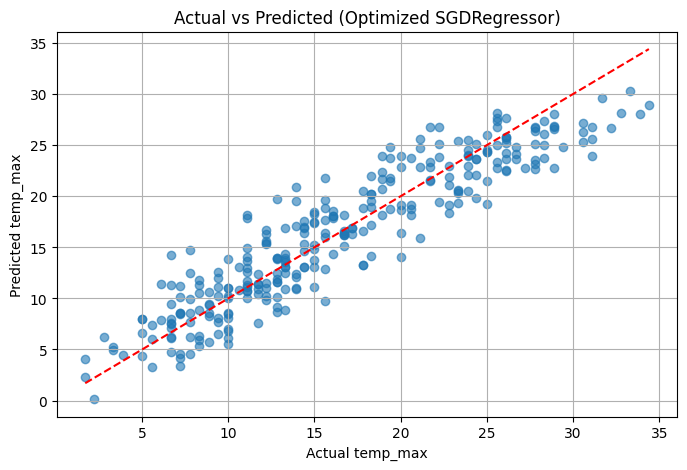

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset
df = pd.read_csv("/content/seattle-weather.csv")

df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

df = pd.get_dummies(df, columns=["weather"], drop_first=True)

#Features and Target
X = df.drop(["temp_max", "date"], axis=1).values
y = df["temp_max"].values

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

n_epochs = int(input("Enter number of epochs: "))
# Linear Regression using SGD

model = SGDRegressor(
    max_iter=n_epochs,
    learning_rate='adaptive',
    eta0=0.01,
    penalty='l2',
    alpha=0.0001,
    early_stopping=True,
    validation_fraction=0.1,
    tol=1e-4,
    random_state=42
)

model.fit(X_train, y_train)

# Predictions & Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("\n----- MODEL PERFORMANCE -----")
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

# Plot Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot(
    [min(y_test), max(y_test)],
    [min(y_test), max(y_test)],
    "r--"
)
plt.xlabel("Actual temp_max")
plt.ylabel("Predicted temp_max")
plt.title("Actual vs Predicted (Optimized SGDRegressor)")
plt.grid()
plt.show()
